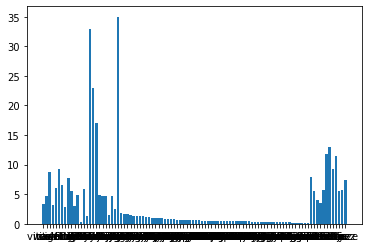

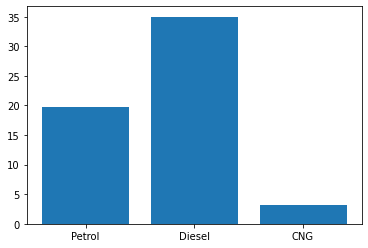

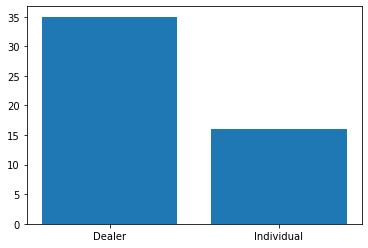

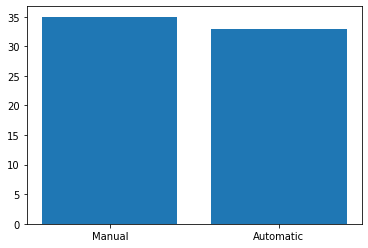

r2 sqyuare value 0.8756155246205007


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


MAE: 1.2698356709065461
MSE: 3.5417485009491716
RMSE: 1.88195337374473


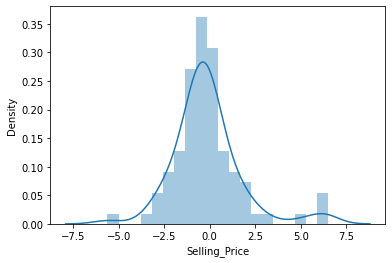

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv('car data.csv')
df['Fuel_Type'].value_counts()
df['Seller_Type'].value_counts()
df['Transmission'].value_counts()
df['Owner'].value_counts()
df_1 = [feature for feature in df.columns if df[feature].dtypes == 'object']

for feature in df_1:
    plt.bar(df[feature],df['Selling_Price'])
    plt.show()


df2 = 2021 - df['Year']
df['NewYear'] = df2
df.drop(['Car_Name','Year'],axis =1,inplace=True)
final_dataset = pd.get_dummies(df,drop_first=True)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = final_dataset.drop('Selling_Price',axis =1)
y = final_dataset['Selling_Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lm.fit(X_train,y_train)
pred = lm.predict(X_test)

from sklearn.metrics import r2_score
re = r2_score(y_test, pred)
print("r2 sqyuare value",re)
sns.distplot(y_test-pred)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [2]:
lm.score(X_train,y_train)

0.8828030918602584

In [3]:
lm.score(X_test,y_test)

0.8756155246205007

In [4]:
from sklearn.linear_model import Lasso
lm2 = Lasso(alpha = 0.001)
lm2.fit(X_train,y_train)

Lasso(alpha=0.001)

In [5]:
pred2 = lm2.predict(X_test)

r2 sqyuare value 0.8757426078049322
MAE: 1.2689765330426321
MSE: 3.538129908865371
RMSE: 1.8809917354590826


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


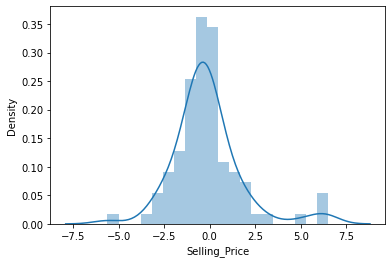

In [6]:
from sklearn.metrics import r2_score
re = r2_score(y_test, pred2)
print("r2 sqyuare value",re)
sns.distplot(y_test-pred2)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred2))
print('MSE:', metrics.mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

X

In [7]:
lm2.score(X_train,y_train)

0.8827839962034634

In [8]:
lm2.score(X_test,y_test)

0.8757426078049322

In [12]:
pip install  statsmodels

Note: you may need to restart the kernel to use updated packages.


'c:\users\manojkumar' is not recognized as an internal or external command,
operable program or batch file.


OLS   


In [14]:
import statsmodels.api as sm
import statsmodels.api as sm

X_train_sm = X
X_train_sm = sm.add_constant(X_train_sm)

lm_sm = sm.OLS(y,X_train_sm.astype(float)).fit()

In [15]:
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Tue, 18 May 2021   Prob (F-statistic):          5.71e-131
Time:                        10:45:47   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

In order to improve r2 value, removing kms_driven clomun , owner and Fuel_Type_Petrol           

In [16]:
import statsmodels.api as sm

X_train_sm = X.drop(['Kms_Driven','Owner','Fuel_Type_Petrol'],axis =1)
X_train_sm = sm.add_constant(X_train_sm)

lm_sm = sm.OLS(y,X_train_sm.astype(float)).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     430.9
Date:                Tue, 18 May 2021   Prob (F-statistic):          2.93e-133
Time:                        10:45:54   Log-Likelihood:                -597.44
No. Observations:                 301   AIC:                             1207.
Df Residuals:                     295   BIC:                             1229.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

Fuel_Type_Petrol            ---- p value is high

In [17]:
X.drop(['Kms_Driven','Owner','Fuel_Type_Petrol'],axis =1).corr()

,Present_Price,NewYear,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
Present_Price,1.000000,0.047584,0.473306,-0.512030,-0.348715
NewYear,0.047584,1.000000,-0.064315,0.039896,-0.000394
Fuel_Type_Diesel,0.473306,-0.064315,1.000000,-0.350467,-0.098643
Seller_Type_Individual,-0.512030,0.039896,-0.350467,1.000000,0.063240
Transmission_Manual,-0.348715,-0.000394,-0.098643,0.063240,1.000000


In [18]:
y_pred = lm_sm.predict(X_train_sm)

In [19]:
y_pred.shape

(301,)

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

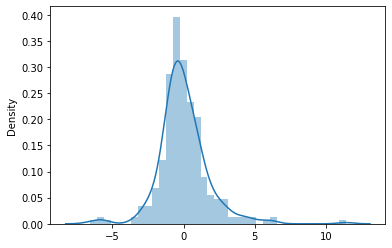

In [20]:
sns.distplot(y-y_pred)

In [31]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas = np.arange(0.001,2,0.01),store_cv_values=True, cv=None)
model = clf.fit(X_train_sm, y)
clf.score(X_train_sm,y, sample_weight=None)

0.8795578025089811

In [44]:
X.drop(['Kms_Driven','Owner','Fuel_Type_Petrol'],axis =1,inplace = True)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
clf = RidgeCV(alphas = np.arange(0.001,2,0.01),store_cv_values=True, cv=None)
clf.fit(X_train, y_train)

RidgeCV(alphas=array([1.000e-03, 1.100e-02, 2.100e-02, 3.100e-02, 4.100e-02, 5.100e-02,
       6.100e-02, 7.100e-02, 8.100e-02, 9.100e-02, 1.010e-01, 1.110e-01,
       1.210e-01, 1.310e-01, 1.410e-01, 1.510e-01, 1.610e-01, 1.710e-01,
       1.810e-01, 1.910e-01, 2.010e-01, 2.110e-01, 2.210e-01, 2.310e-01,
       2.410e-01, 2.510e-01, 2.610e-01, 2.710e-01, 2.810e-01, 2.910e-01,
       3.010e-01, 3.110e-01, 3.210e-0...
       1.741e+00, 1.751e+00, 1.761e+00, 1.771e+00, 1.781e+00, 1.791e+00,
       1.801e+00, 1.811e+00, 1.821e+00, 1.831e+00, 1.841e+00, 1.851e+00,
       1.861e+00, 1.871e+00, 1.881e+00, 1.891e+00, 1.901e+00, 1.911e+00,
       1.921e+00, 1.931e+00, 1.941e+00, 1.951e+00, 1.961e+00, 1.971e+00,
       1.981e+00, 1.991e+00]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=True)

In [59]:
pred2 = clf.predict(X_test)

In [60]:
clf.score(X_test,y_test, sample_weight=None)

0.8767872524266216

r2 sqyuare value 0.8767872524266217
MAE: 1.2598493190441995
MSE: 3.5083844883729425
RMSE: 1.8730682017409144


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


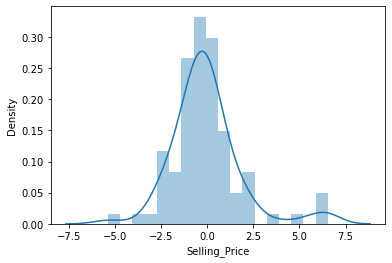

In [61]:
from sklearn.metrics import r2_score
re = r2_score(y_test, pred2)
print("r2 sqyuare value",re)
sns.distplot(y_test-pred2)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred2))
print('MSE:', metrics.mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))